In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')

In [112]:
anime_fulldf = pd.read_csv("C://Users/annad/OneDrive/Documents/JNote/animes90to23.csv")

In [105]:
ratings = pd.read_csv("C://Users/annad/OneDrive/Documents/JNote/rating.csv")

## Filtering the Anime df

Filtering for unique "media_types" gives an array with the following types of entries: 'movie', 'ova', 'tv', 'special', 'music', 'ona'. In general OVAs and specials are additional content for a pre-existing show so included these would be redundant. It also is reasonable to ommit music entries.

In [113]:
anime_fulldf["media_type"].unique()

array(['movie', 'ova', 'tv', 'special', 'music', 'ona'], dtype=object)

For all entries the nsfw column has value "white" so it will also be ommitted.

In [126]:
anime_fulldf["nsfw"].unique()

array(['white'], dtype=object)

While having a large data set is often good, there are many obscure entries that would be unavailable to watch online or wouldn't be of interest to the vast majority of viewers. These obscure shows also are more likely to be missing a synopsis, reviews, and ratings. For simplicity this project will only be considering TV shows, ONAs, and movies with 5,000+ members. This leaves 4697 entries.

In [132]:
anime = anime_fulldf[anime_fulldf['media_type'].isin(['tv', 'movie', 'ona'])].loc[anime_fulldf['num_list_users'] >= 5000].reset_index()

In [127]:
# reformatting the df so all genres are in one column
genres = anime["genre1"]+", "+anime["genre2"]+", "+anime["genre3"]+", "+anime["genre4"]+", "+ anime["genre5"]+", "+ anime["genre6"]+", "+ anime["genre7"]
genres.replace(", na", "", regex=True, inplace=True)
anime_ref =anime.drop(df.columns[[0,6,10,11, 12, 13, 14, 15, 16]], axis=1)
anime_ref['genres'] = genres.tolist()

In [129]:
anime_ref

,index,anime_id,anime_name,anime_start_year,synopsis,num_list_users,num_episodes,rating,media_type,genres
0,0,895,Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsu...,1990,"In his laboratory, biotechnology expert Dr. Ko...",111205,1,pg_13,movie,"Action, Adventure, Comedy, Fantasy, Sci-Fi, Sh..."
1,2,1375,Watashi no Ashinaga Ojisan,1990,Daddy Long Legs is based on the novel of the s...,16367,40,g,tv,"Comedy, Historical, Romance, School, Slice of ..."
2,3,1261,Kyattou Ninden Teyandee,1990,"In the city of Edoropolis, hundreds of mechani...",13370,54,g,tv,"Action, Anthropomorphic, Comedy, Mecha, Sci-Fi..."
3,4,951,Chibi Maruko-chan,1990,Momoko Sakura is an elementary school student ...,11986,142,g,tv,"Comedy, Shoujo, Slice of Life"
4,8,2677,Doraemon Movie 11: Nobita to Animal Planet,1990,Nobita went to a world of animals through the ...,7317,1,pg,movie,"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen"
...,...,...,...,...,...,...,...,...,...,...
4692,16681,54122,Ooyukiumi no Kaina: Hoshi no Kenja,2023,A world blanketed in an endless and ever-growi...,6143,1,pg_13,movie,"Fantasy, Shounen"
4693,16682,54858,Hypnosis Mic: Division Rap Battle - Rhyme Anima +,2023,Second season of Hypnosis Mic: Division Rap Ba...,5872,0,r,tv,"Adult Cast, Drama, Music"
4694,16683,55149,Komada Jouryuusho e Youkoso,2023,Koutarou visits Komada Distillery for a projec...,5789,1,na,movie,"Gourmet, Workplace"
4695,16684,49523,Digimon Adventure 02: The Beginning,2023,NaN,5585,1,pg,movie,"Action, Adventure, Comedy, Drama, Fantasy"


## Missing Values

Only the synopsis is missing for <1% of all entries.

In [130]:
# Check for missing values
print("Anime missing values (%):\n")
print(round(anime_ref.isnull().sum().sort_values(ascending=False)/len(anime_ref.index),4)*100) 
print("\n","*"*50,"\n\nRating missing values (%):\n")
print(round(ratings.isnull().sum().sort_values(ascending=False)/len(ratings.index),4)*100)

Anime missing values (%):

synopsis            0.32
index               0.00
anime_id            0.00
anime_name          0.00
anime_start_year    0.00
num_list_users      0.00
num_episodes        0.00
rating              0.00
media_type          0.00
genres              0.00
dtype: float64

 ************************************************** 

Rating missing values (%):

user_id     0.0
anime_id    0.0
rating      0.0
dtype: float64


In comparison almost 10% of all entries are missing a synopsis in the original dataset

In [117]:
# Compare missing values in the full anime dataframe
print("Anime missing values (%):\n")
print(round(anime_fulldf.isnull().sum().sort_values(ascending=False)/len(anime_fulldf.index),4)*100) 

Anime missing values (%):

synopsis            9.63
Unnamed: 0          0.00
media_type          0.00
genre6              0.00
genre5              0.00
genre4              0.00
genre3              0.00
genre2              0.00
genre1              0.00
rating              0.00
anime_id            0.00
num_episodes        0.00
nsfw                0.00
num_list_users      0.00
anime_start_year    0.00
anime_name          0.00
genre7              0.00
dtype: float64


## Histogram of user ratings

Ignoring the -1 (N/A) ratings shows that the histogram is very left skewed. There are few ratings that have scores less than 4 and users tend to give ratings between 7 and 10.

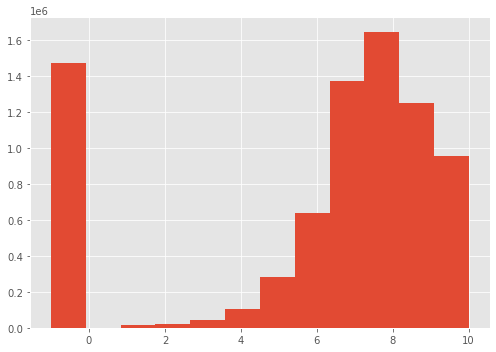

In [22]:
axs = plt.subplots(1, 1, figsize =(7, 5), 
                        tight_layout = True)

plt.hist(rating_df["rating"], bins= 12)
plt.show()